# Model Weight Estimation Variance

> Premises: Aquabyte Weight Estimation should aim to be accurate on average

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
np.random.seed(3841192785)

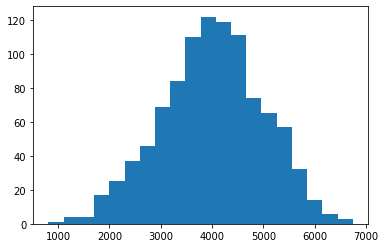

In [2]:
# generate a population
N = 1000
population = np.random.normal(4000,1000,size=N)
population.sort()
plt.hist(population, bins=20);

In [3]:
# Three function with difference estimation error
f_best = lambda x: x * np.random.normal(1, 1e-3)
f_better = lambda x: x * np.random.normal(1, 2e-2)
f = lambda x: x * np.random.normal(1, 0.08)

# Note I model the variance with multiplication. This might make average harder to analyze.

In [4]:
for i in range(5): print(f_best(4000))

3999.7086026603097
4001.3535132150055
3995.9931658665455
4005.1806679196343
3998.1080046936777


In [5]:
for i in range(5): print(f_better(4000))

4072.301516537192
4022.7955813690082
4097.373900098916
3996.687173867039
3912.5929929567947


In [6]:
for i in range(5): print(f(4000))

3652.919600362365
3791.5450071867276
4068.2246230802753
3945.3919770965645
3771.5904512178445


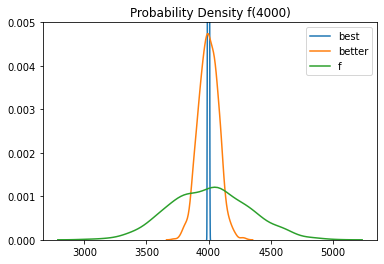

In [7]:
# probabilitly density f vs f_better vs f_best
fig, ax = plt.subplots()
sns.kdeplot([f_best(4000) for i in range(1000)], label='best')
sns.kdeplot([f_better(4000) for i in range(1000)], label='better')
sns.kdeplot([f(4000) for i in range(1000)], label='f')
ax.set_ylim(0, 0.005)
ax.legend()
ax.set_title("Probability Density f(4000)");

In [8]:
# reduce variance by averaging many estimates
for i in range(5): print(np.array([f(4000) for i in range(10)]).mean())

3885.2189654291483
3827.875230330251
4072.793667600451
3988.0103257936803
4063.1743599180472


# Compare Estimations

In [9]:
f_best_estimates = [f_best(x) for x in population]
f_better_estimates = [f_better(x) for x in population]
f_estimates = [f(x) for x in population]

## Pairwise Scatter Plot

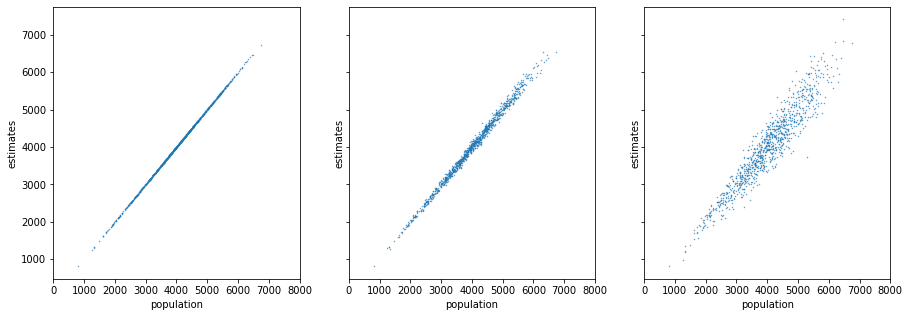

In [10]:
def plot_scatter(ax, estimates):
    ax.scatter(population, estimates, marker='.', s=0.8, alpha=0.8)
    ax.set_xlim(0,8000)
    ax.set_xlabel('population')
    ax.set_ylabel('estimates')

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15,5), ncols=3, sharey=True, facecolor='w')
plot_scatter(ax1, f_best_estimates)
plot_scatter(ax2, f_better_estimates)
plot_scatter(ax3, f_estimates)

## Pairwise Error Plot

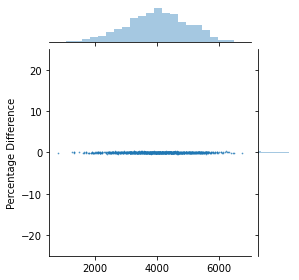

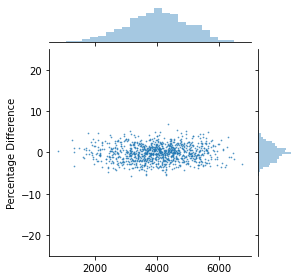

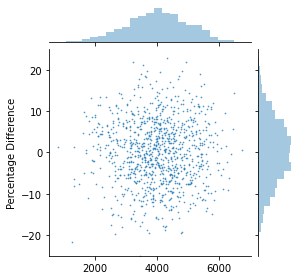

In [11]:
def plot_error(ax, estimates):
    errors = (estimates - population) / population * 100
    g = sns.jointplot(x=population, y=errors.clip(-30,30), kind='scatter', s=0.5, alpha=0.7, height=4)
    g.ax_joint.set(ylabel="Percentage Difference")
    g.ax_joint.set_ylim((-25,25))

plot_error(ax1, f_best_estimates)
plot_error(ax2, f_better_estimates)
plot_error(ax3, f_estimates)

## CDF plot and Kolmogorov-Smirnov statistic

```
Signature: stats.ks_2samp(data1, data2, alternative='two-sided', mode='auto')
Docstring:
Compute the Kolmogorov-Smirnov statistic on 2 samples.

This is a two-sided test for the null hypothesis that 2 independent samples
are drawn from the same continuous distribution.  The alternative hypothesis
can be either 'two-sided' (default), 'less' or 'greater'.
```

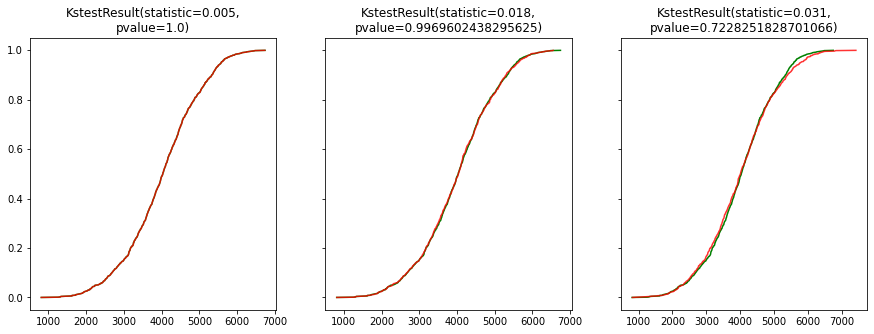

In [12]:
def plot_cdf_ks_test(ax, estimates):
    ax.plot(population, np.arange(N)/N, c='green')
    ax.plot(sorted(estimates), np.arange(N)/N, c='red', alpha=0.8)
    ks = stats.ks_2samp(population, estimates)
    ax.set_title(str(ks).replace(', ', ',\n'))

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15,5), ncols=3, facecolor='w', sharey=True)
plot_cdf_ks_test(ax1, f_best_estimates)
plot_cdf_ks_test(ax2, f_better_estimates)
plot_cdf_ks_test(ax3, f_estimates)

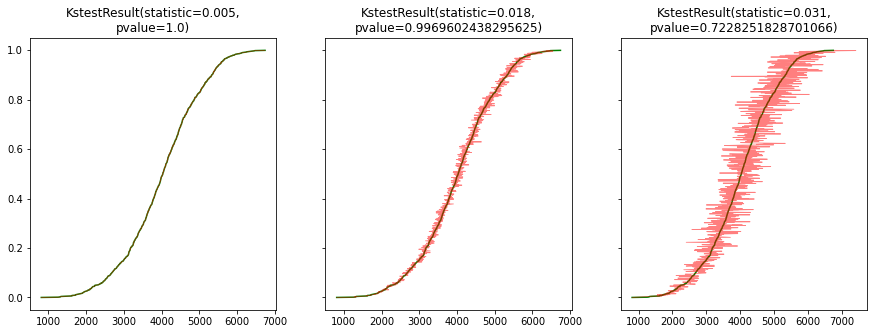

In [13]:
# An intuition of why the CDF fit the original distribution better than expected
def plot_cdf_viz_2(ax, estimates):
    ax.plot(population, np.arange(N)/N, c='green')
    ax.plot(estimates, np.arange(N)/N, c='red', alpha=0.5, lw=0.8)
    ks = stats.ks_2samp(population, estimates)
    ax.set_title(str(ks).replace(', ', ',\n'))

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15,5), ncols=3, facecolor='w', sharey=True)
plot_cdf_viz_2(ax1, f_best_estimates)
plot_cdf_viz_2(ax2, f_better_estimates)
plot_cdf_viz_2(ax3, f_estimates)